<a href="https://colab.research.google.com/github/Priya-gawhane/Machine-learning-prediction-Models-Projects/blob/main/Recognizing_Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier


Data collection and preprocessing

In [ ]:
digits = datasets.load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [ ]:
def plot_multi(i):
  nplots = 16
  fig = plt.figure(figsize=(15, 15))
  for j in range(nplots):
    plt.subplot(4, 4, j+1)
    plt.imshow(digits.images[i+j], cmap='Heatmap')
    plt.title(digits.targets[i+j])
    plt.axis('off')
  plt.show()
  plot_multi(0)

Training neural network with the dataset

In [ ]:
y = digits.target
x = digits.images.reshape((len(digits.images)),-1)

In [ ]:
x.shape

(1797, 64)

printing the one dimensional arrays

In [ ]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

splitting the data

In [ ]:
x_train = x[:1000]
y_train = y[:1000]


In [ ]:
x_test = x[1000:]
y_test = y[1000:]

multi layer perception classifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(15,),
                    activation='logistics',
                    alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=1,
                    learning_rate_init=.1,
                    verbose=True)

Training MlP Model

In [ ]:
mlp = MLPClassifier(activation='logistic', solver='adam', max_iter=1000)

In [ ]:
mlp.fit(x_train, y_train)

MLPClassifier(activation='logistic', max_iter=1000)

In [ ]:
print(mlp)

MLPClassifier(activation='logistic', max_iter=1000)


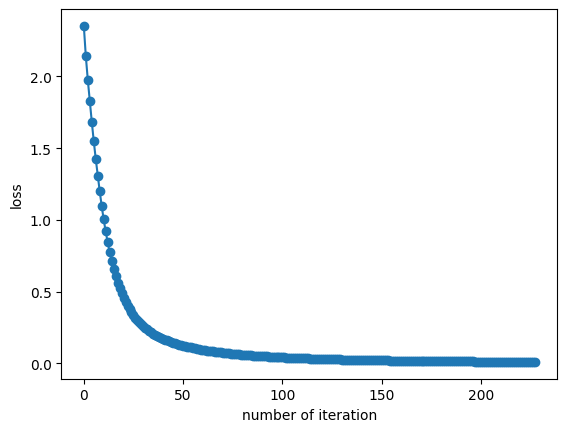

In [ ]:
fig, axes = plt.subplots(1, 1)
axes.plot(mlp.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()

Model Evaluation

In [ ]:
predictions = mlp.predict(x_test)
predictions[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [ ]:
y_test[:50]

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

In [ ]:
accuracy_score(y_test, predictions)

0.944792973651192